<a href="https://colab.research.google.com/github/nurin07/Data-Warehousing-and-Data-Mining/blob/main/Lab_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# List of stock symbols for 10 commercial banks (replace with actual symbols)
bank_symbols = ['ADBL', 'NABIL', 'RBB', 'HBL', 'SBL', 'NIBL', 'EBL', 'NABIL', 'LBBL', 'CBBL']

# Dates for data retrieval
from_date = '2025-04-19'
to_date = '2025-05-19'

# Function to fetch data for each bank
def fetch_bank_data(symbol):
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    params = {
        'stockSymbol': symbol,
        'fromDate': from_date,
        'toDate': to_date,
        'pageNo': '1',
        'itemsPerPage': '10',
        'pagePerDisplay': '5'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if 'result' in data and 'data' in data['result']:
            return pd.DataFrame(data['result']['data'])
        else:
            print(f"Unexpected JSON structure for {symbol}")
            return pd.DataFrame()
    else:
        print(f"Failed to fetch data for {symbol}")
        return pd.DataFrame()

# Fetch data for all banks
bank_data_frames = {}
for symbol in bank_symbols:
    df = fetch_bank_data(symbol)
    if not df.empty:
        df['stock_symbol'] = symbol  # Keep track of the bank
        bank_data_frames[symbol] = df

# Combine all data into a single DataFrame
combined_df = pd.concat(bank_data_frames.values(), ignore_index=True)

# Show the combined data
print(combined_df.head())


   sn            tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
0   1  2025-05-19T00:00:00      2025-05-19    284.90     280.1        282.78   
1   2  2025-05-18T00:00:00      2025-05-18    283.50     278.0        280.36   
2   3  2025-05-15T00:00:00      2025-05-15    282.00     278.2        281.11   
3   4  2025-05-14T00:00:00      2025-05-14    285.00     280.0        281.08   
4   5  2025-05-13T00:00:00      2025-05-13    286.79     280.9        282.06   

   noOfTransactions  volume      amount  previousClosing  differenceRs  \
0               133   21693  6134099.50           280.36          2.42   
1               187   26842  7510458.40           281.11         -0.75   
2               158   26415  7412963.80           281.08          0.03   
3               169   18859  5300226.60           282.06         -0.98   
4               172   21636  6119318.96           284.27         -2.21   

   percentChange stock_symbol  
0           0.86         ADBL  
1         

In [ ]:
import pandas as pd

# Save your existing DataFrame to a CSV file
df.to_csv('stock_data.csv', index=False)

In [ ]:
# Simple cleaning steps

# Convert 'tradeDate' to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'], errors='coerce')

# Convert numeric columns to float (if they are not already)
numeric_cols = ['maxPrice', 'minPrice', 'closingPrice', 'noOfTransactions', 'volume', 'amount', 'previousClosing', 'differenceRs', 'percentChange']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate rows
df = df.drop_duplicates()

# Optional: drop rows with missing data (if any)
df = df.dropna()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sn                10 non-null     int64         
 1   tradeDate         10 non-null     datetime64[ns]
 2   tradeDateString   10 non-null     object        
 3   maxPrice          10 non-null     float64       
 4   minPrice          10 non-null     float64       
 5   closingPrice      10 non-null     float64       
 6   noOfTransactions  10 non-null     int64         
 7   volume            10 non-null     int64         
 8   amount            10 non-null     float64       
 9   previousClosing   10 non-null     float64       
 10  differenceRs      10 non-null     float64       
 11  percentChange     10 non-null     float64       
 12  stock_symbol      10 non-null     object        
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 1.1+ KB
None


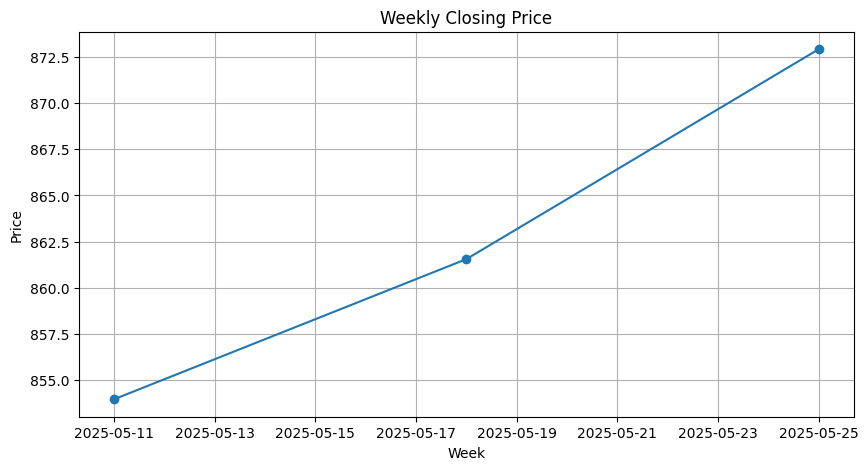

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'tradeDate' to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'])

# 2. Set 'tradeDate' as index
df.set_index('tradeDate', inplace=True)

# 3. Resample the data to weekly frequency with aggregation
weekly_df = df.resample('W').agg({
    'maxPrice': 'max',
    'minPrice': 'min',
    'closingPrice': 'last'
})

# 4. Plot weekly closing prices
plt.figure(figsize=(10, 5))6
plt.plot(weekly_df.index, weekly_df['closingPrice'], marker='o')
plt.title('Weekly Closing Price')
plt.xlabel('Week')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Data from 2025-05-05 00:00:00 to 2025-05-19 00:00:00
Number of rows in the dataset: 10
            maxPrice  minPrice  closingPrice
tradeDate                                   
2025-05-31     875.0     838.0        872.92


<ipython-input-41-4226809945>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').agg({


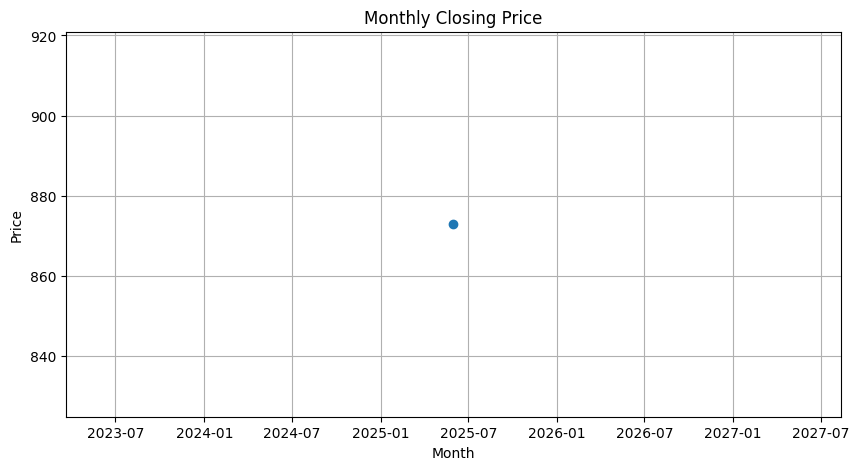

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual data source)
df = pd.read_csv('stock_data.csv')

# Step 1: Ensure 'tradeDate' is datetime and set as index
if 'tradeDate' in df.columns:
    df['tradeDate'] = pd.to_datetime(df['tradeDate'])
    df.set_index('tradeDate', inplace=True)
else:
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

# Step 2: Check the date range and rows
print(f"Data from {df.index.min()} to {df.index.max()}")
print(f"Number of rows in the dataset: {len(df)}")

# Step 3: Resample to monthly data
monthly_df = df.resample('M').agg({
    'maxPrice': 'max',
    'minPrice': 'min',
    'closingPrice': 'last'
})

# Step 4: Check resampled data
print(monthly_df)

# Step 5: Plot monthly closing price
plt.figure(figsize=(10, 5))
plt.plot(monthly_df.index, monthly_df['closingPrice'], marker='o')
plt.title('Monthly Closing Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()


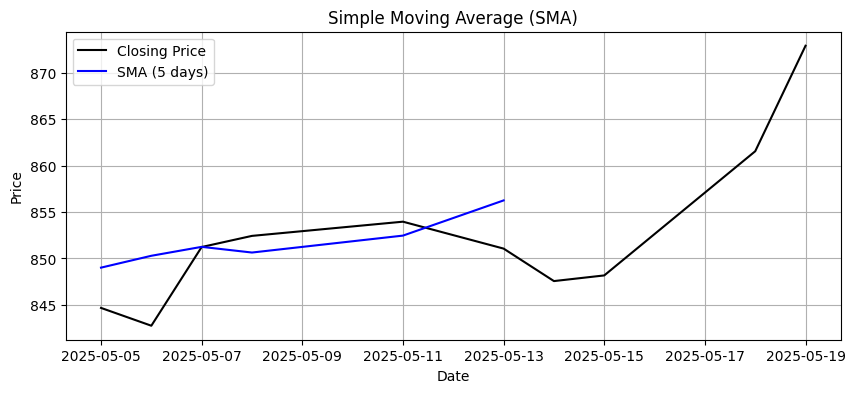

In [ ]:
import matplotlib.pyplot as plt

df['SMA_5'] = df['closingPrice'].rolling(window=5).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['closingPrice'], label='Closing Price', color='black')
plt.plot(df.index, df['SMA_5'], label='SMA (5 days)', color='blue')
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


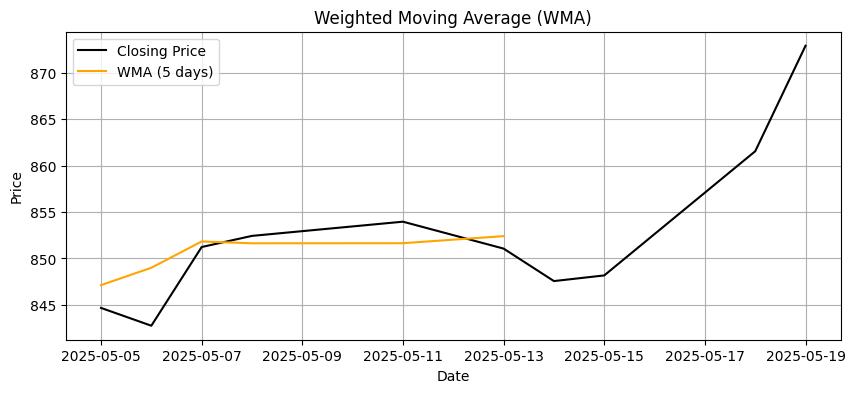

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.arange(1, 6)
df['WMA_5'] = df['closingPrice'].rolling(window=5).apply(
    lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['closingPrice'], label='Closing Price', color='black')
plt.plot(df.index, df['WMA_5'], label='WMA (5 days)', color='orange')
plt.title('Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


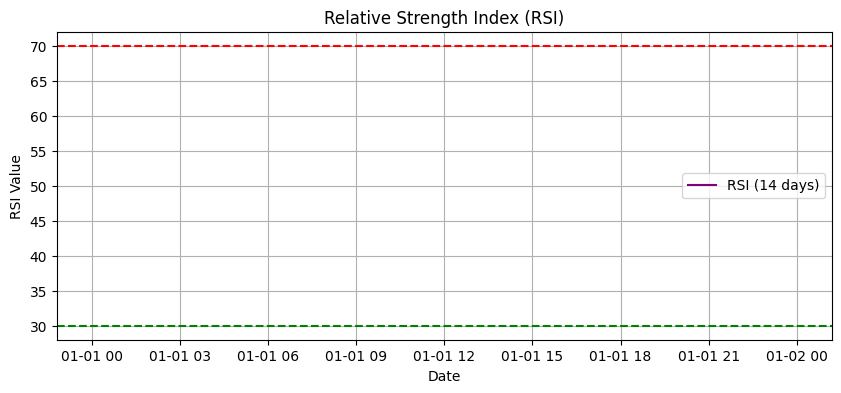

In [ ]:
delta = df['closingPrice'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['RSI_14'], label='RSI (14 days)', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()


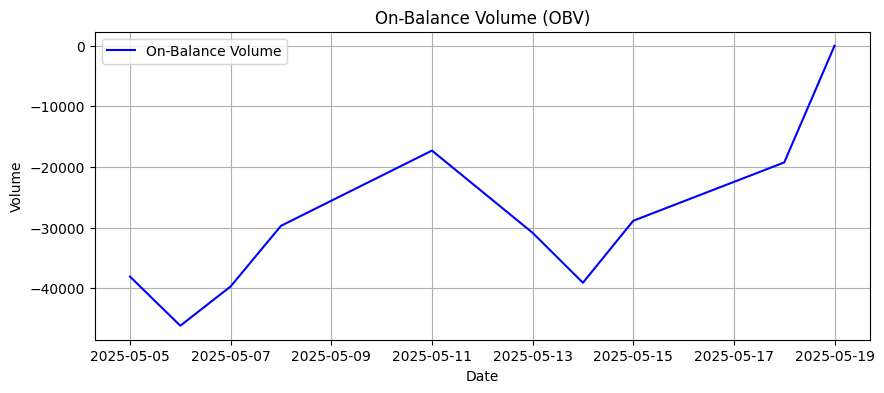

In [ ]:
df['OBV'] = 0
df['OBV'] = np.where(
    df['closingPrice'] > df['closingPrice'].shift(1), df['volume'],
    np.where(df['closingPrice'] < df['closingPrice'].shift(1), -df['volume'], 0)
)
df['OBV'] = df['OBV'].cumsum()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['OBV'], label='On-Balance Volume', color='blue')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


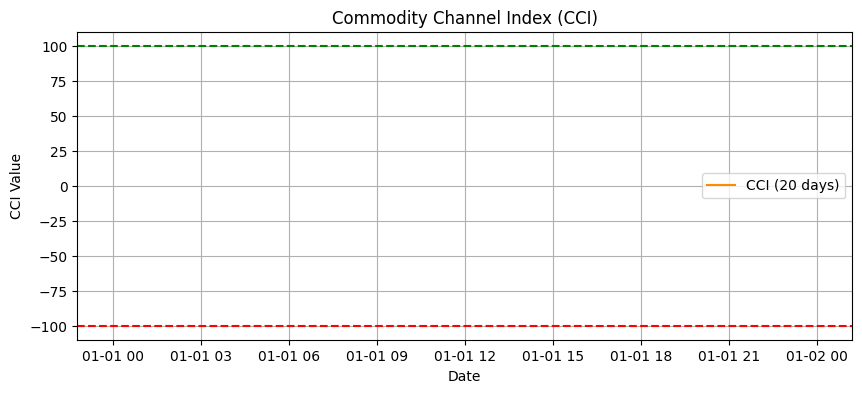

In [ ]:
TP = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
rolling_TP = TP.rolling(window=20)
df['CCI'] = (TP - rolling_TP.mean()) / (0.015 * rolling_TP.std())

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['CCI'], label='CCI (20 days)', color='darkorange')
plt.axhline(100, color='green', linestyle='--')
plt.axhline(-100, color='red', linestyle='--')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.legend()
plt.grid(True)
plt.show()
